# Graphing word frequencies over time
Some of you have said that you want to look at word frequencies over time in your corpus.

You can make your charts in Pandas, or in any other graphing program you would like, such as Tableau.

## Word frequencies over time

Let's make a dataframe. I released a new version of `make_dtm` that fixes a problem that some of you observed: Under certain conditions, the `drop_below` argument would reurn different numbers of words for the scaled and the raw versions of the document-term matrices.

The current version of the function generates a list of the words with the highest *raw* frequencies over the whole corpus, and allows you to select a number of those words that you want to return. The default option is to return all words. If you set the argument `keep_top` to, say, `1000`, you will return only the 1,000 words that are most frequent across the whole corpus. That filtered dataframe can be `scaled` or raw.

That said, the percentages of each word will be calculated relative to the total number of tokens in each text regardless of the total number of words you choose to return. So, you should exepct that the sum of all of the scaled frequencies will be less than 1.0 since it is very likely that less than 100% of the words in a given text will also be included in the top 1,000 words overall.

Otherwise, the function works identically: You pass it a path to a folder containing texts, set options if you want to, and it spits out a document-term matrix.

In [342]:
from make_dtm import *

In [343]:
corp_path = '/Users/e/Library/Mobile Documents/com~apple~CloudDocs/PhD/ltm/corpora/race/texts'

In [344]:
# new version takes about 1 second per novel to process on my computer
dtm = make_dtm(corp_path, scaled = True, keep_top = 4000)

In [329]:
# to demonstrate what percentage of all of the words in a given text included in the top 4,000
dtm.sum(axis = 'columns').sort_values(ascending = False)[:5]

filepath
00020738.txt    0.959354
00020084.txt    0.932080
00020063.txt    0.929793
00020906.txt    0.925727
00020686.txt    0.923623
dtype: float64

In [330]:
dtm.sum(axis = 'columns').sort_values()[:5]# "axis" indicates which axis you want to sum along.

filepath
00020755.txt    0.830065
00020818.txt    0.841195
00020804.txt    0.850271
00020531.txt    0.856969
00020848.txt    0.863670
dtype: float64

So, at most the top 4,000 words in this corpus describe 95% of all of the tokens in a text. At the low end, they account for 83% of the tokens in a text.

In [345]:
dtm.head()

,a,aaron,abandoned,able,about,above,abruptly,absence,absolutely,absurd,...,younger,your,youre,yours,yourself,youth,youve,yul,zelenko,zulfiqar
filepath,,,,,,,,,,,,,,,,,,,,,
00020055.txt,0.025098,NaN,0.000011,0.000068,0.002253,0.000649,0.000028,0.000006,0.000045,0.000040,...,0.000028,0.002270,0.000768,0.000062,0.000203,0.000079,0.000231,NaN,NaN,NaN
00020063.txt,0.014889,NaN,NaN,0.000113,0.001088,0.000300,NaN,NaN,0.000038,NaN,...,0.000038,0.001125,0.000338,0.000038,0.000188,NaN,0.000038,NaN,NaN,NaN
00020084.txt,0.016666,NaN,0.000037,0.000311,0.001628,0.000485,0.000112,NaN,NaN,NaN,...,0.000087,0.001740,0.000050,0.000062,0.000099,0.000025,NaN,NaN,NaN,NaN
00020085.txt,0.022344,0.000008,0.000020,0.000192,0.003251,0.000132,0.000004,0.000004,0.000084,0.000008,...,0.000056,0.001499,0.000814,0.000044,0.000253,0.000012,0.000164,NaN,NaN,NaN
00020209.txt,0.028819,0.000451,0.000020,0.000108,0.003373,0.000088,0.000028,0.000016,0.000196,0.000036,...,0.000064,0.002459,0.002211,0.000092,0.000299,0.000028,0.000651,NaN,0.000255,NaN


Now, we're going to add our year metadata to this table:

In [332]:
meta_path = '/Users/e/Library/Mobile Documents/com~apple~CloudDocs/PhD/ltm/corpora/race/meta.csv'
meta = pd.read_csv(meta_path)

In [333]:
meta.head()

,BOOK_ID,FILENAME,LIBRARIES,TITLE,AUTH_LAST,AUTH_FIRST,AUTH_ID,WRITTEN_AS,PUBL_CITY,PUBLISHER,PUBL_DATE,SOURCE,NATIONALITY,GENRE,CLEAN?
0,20324,00020324.txt,483,Tambourines to glory,Hughes,Langston,A_01729,NaN,New York,John Day,1958,k,American,NaN,c
1,20055,00020055.txt,1577,Invisible Man,Ellison,Ralph,A_01078,NaN,New York,Random House,1952,k,American,MOD,c
2,20084,00020084.txt,953,Go tell it on the mountain,Baldwin,James,A_00139,NaN,New York,Alfred A. Knopf,1953,k,American,MOD,c
3,20213,00020213.txt,1107,Giovanni's room,Baldwin,James,A_00139,NaN,New York,Dial Press,1956,k,American,MOD,c
4,20774,00020774.txt,411,Nova,Delany,Samuel R,A_00905,NaN,Garden City/N.Y.,"""Doubleday, Page & Co.""",1968,k,American,SCI,c


Specifically going to add data about libraries, titles, and publication date for reasons that will become clear:

In [346]:
df = pd.merge(dtm, meta[['FILENAME','PUBL_DATE', 'LIBRARIES', 'TITLE']], left_on='filepath', right_on='FILENAME')

In [347]:
df.head()

,a,aaron,abandoned,able,about,above,abruptly,absence,absolutely,absurd,...,yourself,youth,youve,yul,zelenko,zulfiqar,FILENAME,PUBL_DATE,LIBRARIES,TITLE
0,0.025098,NaN,0.000011,0.000068,0.002253,0.000649,0.000028,0.000006,0.000045,0.000040,...,0.000203,0.000079,0.000231,NaN,NaN,NaN,00020055.txt,1952,1577,Invisible Man
1,0.014889,NaN,NaN,0.000113,0.001088,0.000300,NaN,NaN,0.000038,NaN,...,0.000188,NaN,0.000038,NaN,NaN,NaN,00020063.txt,1952,2499,The old man and the sea
2,0.016666,NaN,0.000037,0.000311,0.001628,0.000485,0.000112,NaN,NaN,NaN,...,0.000099,0.000025,NaN,NaN,NaN,NaN,00020084.txt,1953,953,Go tell it on the mountain
3,0.022344,0.000008,0.000020,0.000192,0.003251,0.000132,0.000004,0.000004,0.000084,0.000008,...,0.000253,0.000012,0.000164,NaN,NaN,NaN,00020085.txt,1953,2080,The adventures of Augie March
4,0.028819,0.000451,0.000020,0.000108,0.003373,0.000088,0.000028,0.000016,0.000196,0.000036,...,0.000299,0.000028,0.000651,NaN,0.000255,NaN,00020209.txt,1955,2398,Marjorie Morningstar


In [349]:
df.sort_values('PUBL_DATE', inplace=True)

Now we can use our `PUBL_DATE` column to plot the frequencies of various words over time:

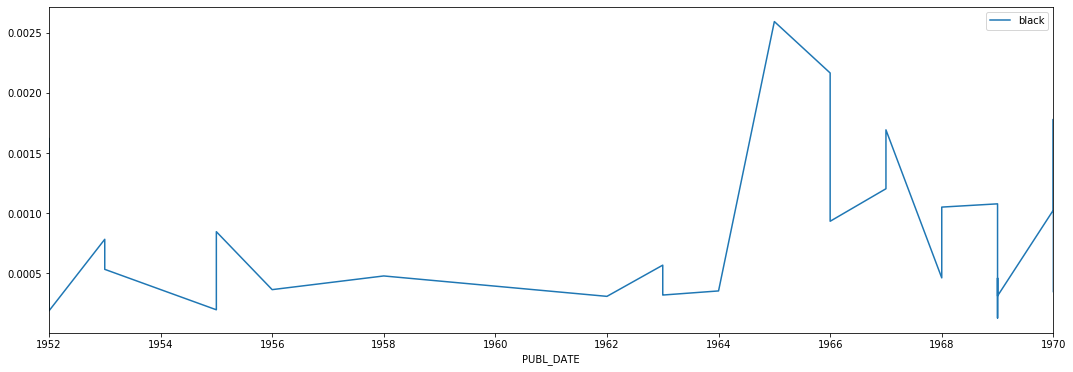

In [351]:
df.plot(x = 'PUBL_DATE', y = 'black', figsize = (18,6))

This graph is spiky because we have relatively few texts to look at. And we must always be careful to say that these are trends *within our corpus*, which exists over the time represented on the x-axis but is of course not the same as it.

The line plot can be misleading about what we actually have. It implies continuities that may not be there. Let's try a scatterplot:

(0, 0.0032238833744244796)

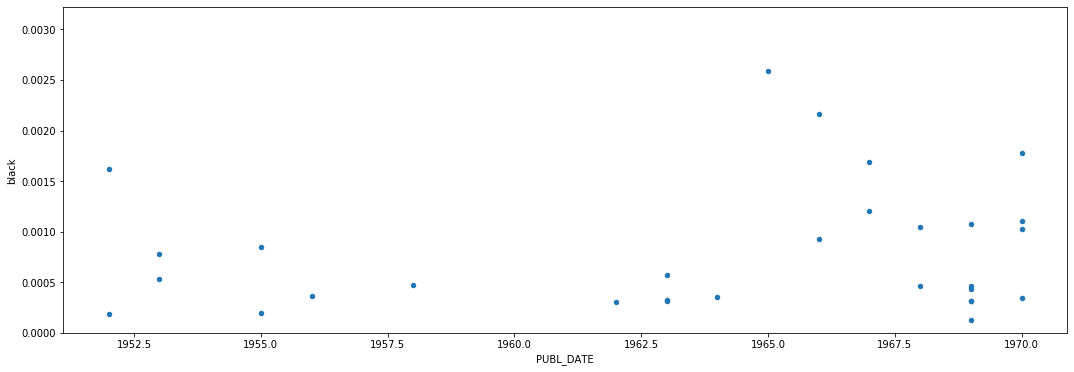

In [354]:
ax = df.plot.scatter(x = 'PUBL_DATE', y = 'black', figsize = (18,6))
# this line sets the y-axis so that we can see all of the points clearly:
ax.set_ylim((0, df['black'].max()+df['black'].std())) # by default, includes negative values that we don't need

We can add additional metadata to a scatterplot like this. For example, let's use our `LIBRARIES` column to color these points by how many places hold them:

(0, 0.0032238833744244796)

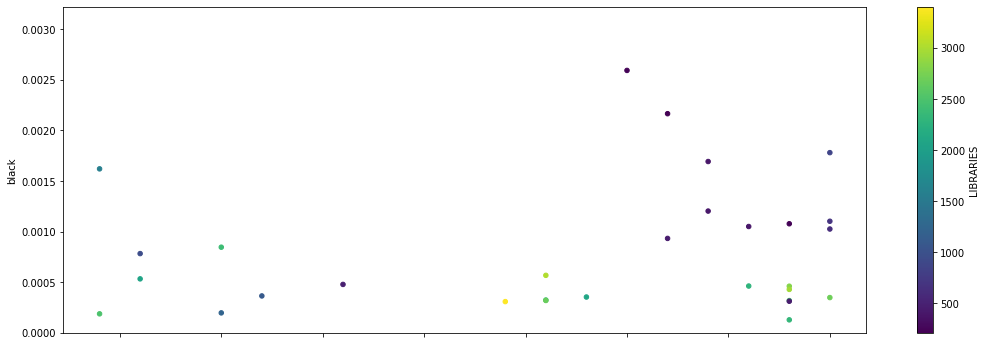

In [355]:
ax = df.plot.scatter(x = 'PUBL_DATE', y = 'black', figsize = (18,6), c = 'LIBRARIES', colormap = 'viridis')
ax.set_ylim((0, df['black'].max()+df['black'].std()))

(`viridis` is the name for the colorscheme associated with the values.)

That's pretty cool--some of the outliers are associated with fewer libraries.

But what are these texts? We need to label our points:

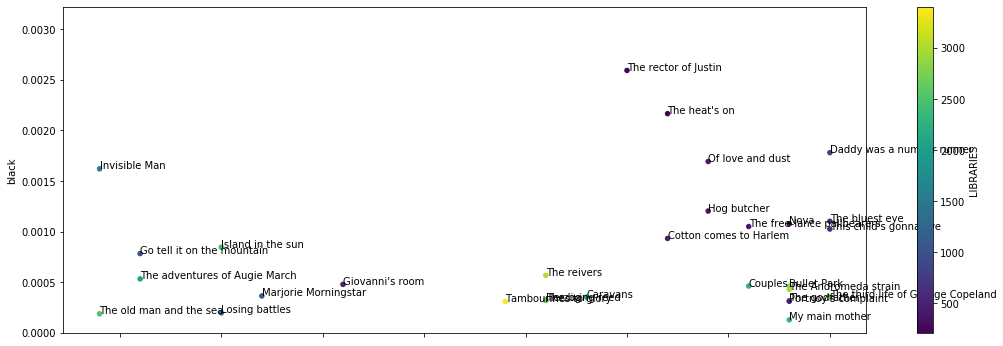

In [356]:
import matplotlib.pyplot as plt # <- conventional import, like import pandas as pd

ax = df.plot.scatter(x = 'PUBL_DATE', y = 'black', figsize = (18,6), c = 'LIBRARIES', colormap = 'viridis')
ax.set_ylim((0, df['black'].max()+df['black'].std()))

# label the points
x_coords = df['PUBL_DATE']
y_coords = df['black']
labels = df['TITLE']

for i,label in enumerate(labels):
    x = x_coords[i]
    y = y_coords[i]
    ax.text(x, y, label, fontsize=10)

plt.show()

Obviously the program doesn't "know" whether the texts of each point will overlap with other parts of the graph; it just plots them all. So there are parts of this that are pretty difficult to read. 

Other software like Tableau will intelligently mark points in such a way that the texts don't overlap like this. And they also enable us to mouse-over the points and see more data about them.

# Showing multiple words over time simultaneously

In [358]:
df[ ['black','white'] ]

,black,white
0,0.001620,0.002016
1,0.000188,0.000525
2,0.000783,0.001243
3,0.000533,0.000645
29,0.000197,0.000748
4,0.000846,0.000734
5,0.000364,0.000456
6,0.000478,0.001046
7,0.000308,0.000936
8,0.000568,0.000673


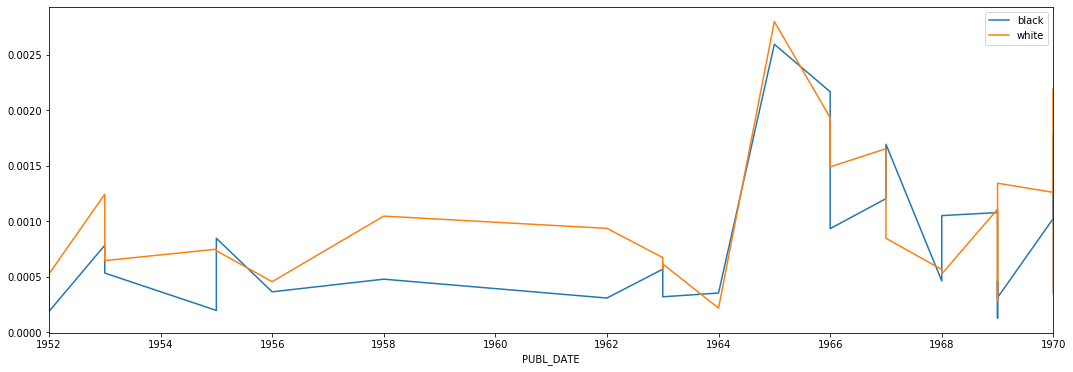

In [240]:
df.plot(x = 'PUBL_DATE', y = ['black','white'], figsize = (18,6))

To show this as a scatterplot we have to set the plot as a variable (the conventional name is `ax`) and add other plots on top of it:

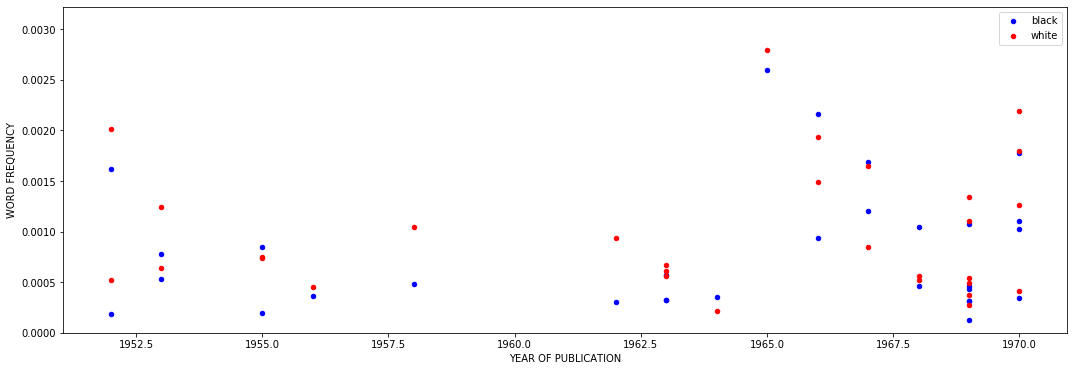

In [363]:
import matplotlib.pyplot as plt

plot1 = df.plot.scatter(x = 'PUBL_DATE', y = 'black', color = 'b', label='black', figsize = (18,6))
plot2 = df.plot.scatter(x = 'PUBL_DATE', y = 'white', color = 'r', label = 'white', figsize = (18,6), ax = plot1) # note the extra ax = ax argument
plot2.set_ylim((0,df['black'].max()+df['black'].std())) # setting the y axis 
plot2.set_ylabel('WORD FREQUENCY')
plot2.set_xlabel('YEAR OF PUBLICATION')
plt.show()